ChEn-3170: Computational Methods in Chemical Engineering Spring 2023 UMass Lowell; Prof. V. F. de Almeida **03Feb23**

# 04. Array Operations
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Cmtrx}{\boldsymbol{\mathsf{C}}}
  \newcommand{\Dmtrx}{\boldsymbol{\mathsf{D}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Qmtrx}{\boldsymbol{\mathsf{Q}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\vvec}{\boldsymbol{\mathsf{v}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \DeclareMathOperator{\rank}{rank}
$

---
## Table of Contents<a id="toc">
* [Objectives](#obj)
* [Formatting Output](#format)
   + `Numpy` `set_printoptions()` method
* [Vectors](#vectors)
   + [Element-by-element addition/subtraction](#vecaddsub)
   + [Element-by-element product/division](#vecproddiv)
   + [Self product](#vecselfprod)
   + [Inner product (dot product)](#vecinnerprod)
   + [Scaling (element-by-element multiplication/division by scalar)](#vecscale)
   + [Element-by-element mathematical operations](#vecops)
   + [Element-by-element search](#vecsearch)
   + [Zip vectors](#veczip)
* [Matrices](#matrices)
   + [Element-by-element addition/subtraction](#mataddsub)
   + [Element-by-element product/division](#matproddiv)
   + [Scaling (element-by-element multiplication/division by scalar)](#matscale)
   + [Element-by-element mathematical operations](#matops)
   + [Transposition](#mattransp)
     - `Numpy` `set_printoptions()` method
   + [Element-by-element search](#matsearch)
---

## [Objectives](#toc)<a id="obj"></a>

 + Cover basic array operations in 1-D (vectors) and 2-D (matrices) needed throughout the course.

In [1]:
'''Python packages are accessed with an import directive as such:'''

import numpy as np  # import the package and create the alias: np

## [Formatting Output](#toc)<a id="format"></a>

* Scientific notation

In [2]:
import math

pi = math.pi

print('pi = %15.5e'%pi) # formatting numeric output: scientific notation

pi =     3.14159e+00


In [3]:
print('pi = %10.5f'%pi) # formatting numeric output: float

pi =    3.14159


In [4]:
print('pi = %10.5e and e = %8.3f'%(pi, math.e)) # formatting numeric output: sci. notation and float

pi = 3.14159e+00 and e =    2.718


* `Numpy` arrays

In [5]:
'''Use set print options in Numpy'''

np.set_printoptions(precision=4, threshold=800, edgeitems=6, linewidth=105)

mtrx = np.random.random((10,100))

print(mtrx)

[[0.6705 0.6793 0.9602 0.2253 0.0635 0.4644 ... 0.9203 0.873  0.8889 0.3189 0.2486 0.8223]
 [0.553  0.9661 0.6668 0.3804 0.2009 0.8049 ... 0.2836 0.7523 0.8696 0.4907 0.4832 0.3541]
 [0.0342 0.3388 0.0333 0.8448 0.1601 0.6551 ... 0.9192 0.0466 0.0288 0.1472 0.4804 0.0329]
 [0.7779 0.3831 0.2177 0.9796 0.0243 0.1526 ... 0.5874 0.1478 0.1399 0.2719 0.4462 0.9133]
 [0.91   0.6659 0.9496 0.1201 0.9532 0.1539 ... 0.2359 0.0061 0.3217 0.888  0.1126 0.6742]
 [0.5781 0.5737 0.3168 0.2638 0.9236 0.0972 ... 0.4702 0.7425 0.1216 0.4501 0.4768 0.2314]
 [0.7651 0.4816 0.6903 0.4749 0.9474 0.0853 ... 0.1778 0.0411 0.9959 0.2714 0.9398 0.1003]
 [0.6753 0.2114 0.0144 0.7857 0.9235 0.2153 ... 0.6665 0.9267 0.1135 0.413  0.5021 0.6646]
 [0.8246 0.7163 0.5801 0.1017 0.7163 0.7426 ... 0.6285 0.0674 0.3029 0.7393 0.3471 0.6574]
 [0.1254 0.8916 0.1863 0.9417 0.7807 0.2485 ... 0.0744 0.7555 0.8787 0.5592 0.6375 0.746 ]]


In [6]:
#help(np.set_printoptions)

## [Vectors](#toc)<a id="vectors"></a>

**In all of engineering calculations use double-precision floating point numeric**

In [7]:
'''Set double precision at creation time'''

x_vec = np.empty(10, dtype=np.float64)

print(type(x_vec))
print(x_vec.dtype)

<class 'numpy.ndarray'>
float64


In [8]:
'''Set double precision after creation'''

x_vec = x_vec.astype(float)
print(type(x_vec))
print(x_vec.dtype)

<class 'numpy.ndarray'>
float64


In [9]:
'''Set single precision after creation; not to be used'''

x_vec = x_vec.astype(np.float32)
print(type(x_vec))
print(x_vec.dtype)

<class 'numpy.ndarray'>
float32


#### [Element-by-element addition/subtraction](#toc)<a id="vecaddsub"></a>

In [10]:
'''Element-by-element addition or subtraction'''

vec1 = np.array(np.random.random(5))
print('vec1     =',vec1)

vec2 = np.array(np.random.random(5))
print('vec2     =',vec2)

result = vec1 + vec2         # element-by-element sum
print('addition   =',result)

result = vec1 - vec2         # element-by-element subtraction
print('difference =',result)

vec1     = [0.0285 0.5089 0.7341 0.4652 0.6362]
vec2     = [0.0308 0.8928 0.4478 0.9927 0.3754]
addition   = [0.0592 1.4017 1.1819 1.4578 1.0116]
difference = [-0.0023 -0.3839  0.2863 -0.5275  0.2608]


#### [Element-by-element product/division](#toc)<a id="vecproddiv"></a>

In [11]:
'''Element-by-element product or division'''

vec1 = np.array(np.random.random(5))
print('vec1    =',vec1)

vec2 = np.array(np.random.random(5))
print('vec2    =',vec2)

result = vec1 * vec2        # element-by-element product
print('product  =',result)

result = vec1 / vec2        # element-by-element division
print('division =',result)

vec1    = [0.1876 0.1503 0.741  0.2196 0.7278]
vec2    = [0.1112 0.4633 0.3083 0.9209 0.1385]
product  = [0.0209 0.0696 0.2285 0.2022 0.1008]
division = [1.6871 0.3244 2.4033 0.2384 5.2559]


#### [Self product](#toc)<a id="vecselfprod"></a>

In [12]:
'''Product of all elements of a vector'''

vec1_prod = np.prod(vec1)

print('vec1         =', vec1)
print('vec1 product =', vec1_prod)

vec1         = [0.1876 0.1503 0.741  0.2196 0.7278]
vec1 product = 0.0033386431152232915


#### [Inner product (dot product)](#toc)<a id="vecinnerprod"></a>

The result of the inner product of two vectors: $\vvec_1 \cdot \vvec_2$ is a scalar.

In [13]:
'''Vector inner product or dot product'''

vec1 = np.array(np.random.random(5))
print('vec1           =',vec1)

vec2 = np.array(np.random.random(5))
print('vec2           =',vec2)

result = np.dot(vec1, vec2)     # inner or dot product
print('dot product =',result)

vec1           = [0.3429 0.2516 0.6579 0.5483 0.4787]
vec2           = [0.7257 0.9632 0.3539 0.7636 0.2257]
dot product = 1.2508156147208593


In [14]:
'''More on vector inner product or dot product'''
'''Another way to compute the inner product'''

ele_by_ele_product = vec1 * vec2

inner_product = ele_by_ele_product.sum()

print('vec1 . vec2 = ', inner_product)

vec1 . vec2 =  1.2508156147208591


#### [Scaling (element-by-element multiplication/division by a scalar)](#toc)<a id="vecscale"></a>

In [15]:
'''Scaling of a vector'''

vec = np.array(np.random.random(5))
print('vec    =',vec)

factor = 0.345
scaled = factor * vec     # scaling of vec element-by-element product
print('scaled =', scaled) # assigned to new variable `scaled`

vec *= factor          # in-place scaling
print('vec    =',vec)

vec    = [0.6754 0.545  0.442  0.6701 0.3592]
scaled = [0.233  0.188  0.1525 0.2312 0.1239]
vec    = [0.233  0.188  0.1525 0.2312 0.1239]


#### [Element-by-element mathematical operations](#toc)<a id="vecops"></a>

In [16]:
'''Mathematical Operations on a Vector'''

vec = np.array(np.random.random(5))
print('vec      =',vec)

log_vec = np.log(vec)         # natural log element-by-element
print('log(vec) =',log_vec)

exp_vec = np.exp(log_vec)     # exponential
print('exp(vec) =',exp_vec)

sin_vec = np.sin(vec)         # sine
print('sin(vec) =',sin_vec)

vec_cubed = vec**3            # powers
print('vec^3    =',vec_cubed)

vec_mean = vec.mean()         # arithmetic mean
print('mean(vec) =',vec_mean)

vec_std = vec.std()           # standard deviation
print('std(vec) =',vec_std)

vec      = [0.4352 0.8323 0.5867 0.4363 0.3873]
log(vec) = [-0.8318 -0.1835 -0.5333 -0.8293 -0.9486]
exp(vec) = [0.4352 0.8323 0.5867 0.4363 0.3873]
sin(vec) = [0.4216 0.7395 0.5536 0.4226 0.3777]
vec^3    = [0.0825 0.5766 0.2019 0.0831 0.0581]
mean(vec) = 0.5355731050972985
std(vec) = 0.16283608945771239


#### [Element-by-element search](#toc)<a id="vecsearch"></a>

In [17]:
'''Searching a vector for entries matching a test'''

# what are the indices of the values in "vec" that satisfy: vec[] >= 0.3
(idx_ids, ) = np.where(vec >= 0.3) 

print('vec =', vec)
print('indices = ', idx_ids)

vec = [0.4352 0.8323 0.5867 0.4363 0.3873]
indices =  [0 1 2 3 4]


In [18]:
'''Searching a vector for entries matching a test'''

# what are the indices of the values in "vec" that satisfy: vec[] == 0.3
(idx_ids, ) = np.where(vec == 0.3) 

print('vec =', vec)
print('indices = ', idx_ids)

vec = [0.4352 0.8323 0.5867 0.4363 0.3873]
indices =  []


#### [Zip vectors](#toc)<a id="veczip"></a>

In [19]:
'''Zip creates a list of tuples on the fly'''

print(list(zip(vec1, vec2)))

[(0.34291255397585296, 0.7257051872733954), (0.25159555869210526, 0.9631875049164348), (0.6579409191685528, 0.3538837154999377), (0.5483311859384481, 0.7636395666453273), (0.4787248281294231, 0.2257383040984181)]


## [Matrices](#toc)<a id="matrices"></a>

**In all of engineering calculations use double-precision floating point numeric**

In [20]:
'''Set double precision at creation time'''

mtrx = np.empty((5,5), dtype=np.float64)

print(type(mtrx))
print(mtrx.dtype)

<class 'numpy.ndarray'>
float64


In [21]:
'''Set double precision after creation'''

mtrx = mtrx.astype(float)

print(type(mtrx))
print(mtrx.dtype)

<class 'numpy.ndarray'>
float64


#### [Element-by-element addition/subtraction](#toc)<a id="mataddsub"></a>

In [22]:
'''Element-by-element addition or subtraction'''

mat1 = np.random.random((3,3))
print('mat1       =\n', mat1)

mat2 = np.random.random((3,3))
print('mat2       =\n', mat2)

result = mat1 + mat2              # element-by-element sum
print('addition   =\n', result)

result = mat1 - mat2              # element-by-element subtraction
print('difference =\n', result)

mat1       =
 [[0.2292 0.1449 0.5491]
 [0.1463 0.3941 0.9169]
 [0.7866 0.1105 0.301 ]]
mat2       =
 [[0.0439 0.8579 0.1347]
 [0.3346 0.0802 0.5403]
 [0.6391 0.7922 0.7513]]
addition   =
 [[0.2731 1.0029 0.6838]
 [0.4809 0.4743 1.4572]
 [1.4258 0.9027 1.0523]]
difference =
 [[ 0.1853 -0.713   0.4144]
 [-0.1882  0.3139  0.3766]
 [ 0.1475 -0.6816 -0.4504]]


#### [Element-by-element product/division](#toc)<a id="matproddiv"></a>

In [23]:
'''Element-by-element product or division'''

mat1 = np.random.random((3,3))
print('mat1     =\n', mat1)

mat2 = np.random.random((3,3))
print('mat2     =\n', mat2)

result = mat1 * mat2          # element-by-element product
print('product  =\n', result)

result = mat1 / mat2          # element-by-element division (cross your fingers)
print('division =\n', result)

mat1     =
 [[0.4344 0.2751 0.908 ]
 [0.788  0.8646 0.5739]
 [0.5456 0.8763 0.2552]]
mat2     =
 [[0.3889 0.0145 0.1248]
 [0.0072 0.9191 0.6192]
 [0.4067 0.8973 0.9206]]
product  =
 [[0.1689 0.004  0.1133]
 [0.0057 0.7947 0.3554]
 [0.2219 0.7863 0.2349]]
division =
 [[  1.1172  18.9558   7.2765]
 [109.474    0.9408   0.9268]
 [  1.3415   0.9766   0.2772]]


In [2]:
'''Produce Noise on a Matrix Image (brick data)'''

from matplotlib import pyplot as plt     # import the pyplot function of the matplotlib package
#%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 4] # extend the figure size on screen output

# Read image from the images/ directory in the chen-3170 repo
#block = plt.imread('images/glacier.png', format='png')
block = plt.imread('https://raw.githubusercontent.com/dpploy/chen-3170/master/notebooks/images/cp21.8-T.png', format='png')


plt.figure(1)
plt.imshow(block)
plt.title('Matrix Reloaded', fontsize=14)
plt.show()
print('block shape =', block.shape)  # inspect the array shape

ValueError: Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.

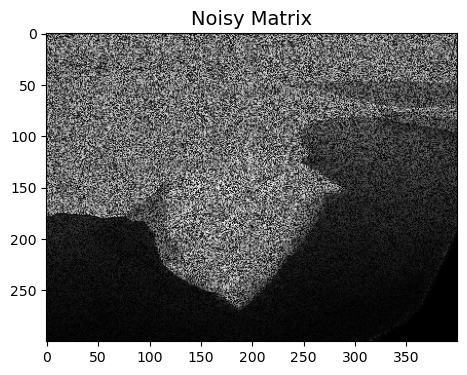

In [28]:
'''Use Matrix Element-by-Element Multiplication'''

mtrx_shape = block.shape[0:2]         # use the shape to automate noise_mtrx generation

noise_mtrx = np.random.random(mtrx_shape)   # generate random matrix

mtrx_noise = block[:,:,2] * noise_mtrx   # apply noise to the blue channel

plt.figure(2)
plt.imshow(mtrx_noise, cmap='gray')
plt.title('Noisy Matrix',fontsize=14)
plt.show()

In [29]:
'''Matrix Scaling (matrix product or division by a scalar)'''

mat1 = np.random.random((3,3))
print('mat1      =\n',mat1)

factor = 3.21
result = factor * mat1        # scaling of mat1 element-by-element; product with factor
print('scaled   =\n',result)

mat1      =
 [[0.686  0.2967 0.9613]
 [0.8542 0.7493 0.1228]
 [0.9247 0.9831 0.6404]]
scaled   =
 [[2.202  0.9524 3.0859]
 [2.7418 2.4051 0.3941]
 [2.9684 3.1557 2.0557]]


#### [Scaling (element-by-element multiplication/division by a scalar)](#toc)<a id="matscale"></a>

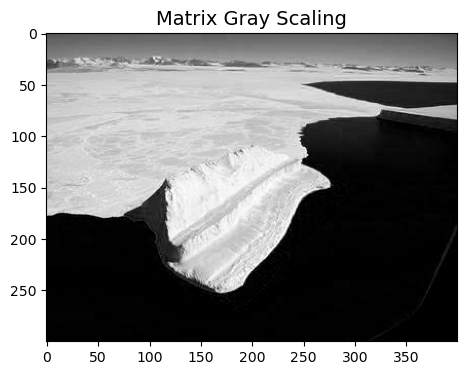

In [30]:
'''Matrix Scaling of an Image'''

color_channel = np.copy(block[:,:,0])   # copy the red channel

color_channel /= color_channel.max()    # scale to gray, 0-255 values
color_channel *= 255
gray_channel  = color_channel.astype(int) # truncate all float data type to int

plt.figure(3)
plt.imshow(gray_channel, cmap='gray')
#plt.imshow(gray_channel)

plt.title('Matrix Gray Scaling',fontsize=14)
plt.show()

#### [Element-by-element mathematical operations](#toc)<a id="matops"></a>

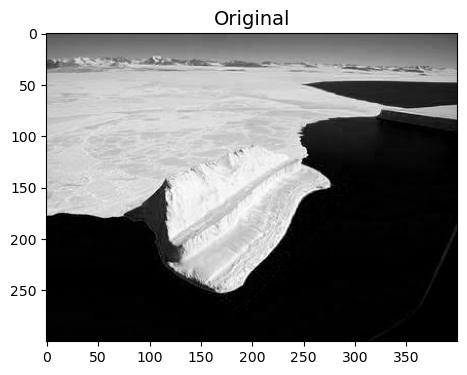

mean(mtrx) = 0.38594216
std(mtrx) = 0.37984067


In [31]:
'''Other Mathematical Operations on a Matrix'''

mtrx = np.copy(block[:,:,0])    # copy the red channel

plt.figure(4)
plt.imshow(mtrx, cmap='gray')              # show channel as a flat image with default colormap
plt.title('Original', fontsize=14)
plt.show()

mtrx_mean = mtrx.mean()         # arithmetic mean
print('mean(mtrx) =', mtrx_mean)

mtrx_std = mtrx.std()           # standard deviation
print('std(mtrx) =', mtrx_std)

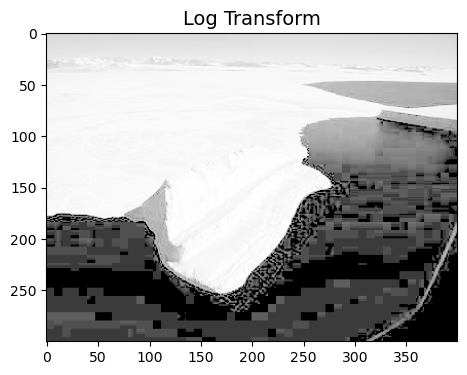

mean(mtrx) = -2.6418166
std(mtrx) = 2.5803103


In [32]:
'''Other Mathematical Operations on a Matrix'''

log_mtrx = np.log(mtrx + .001)  # natural log element-by-element

plt.figure(5)
plt.imshow(log_mtrx, cmap='gray')
plt.title('Log Transform', fontsize=14)
plt.show()

mtrx_mean = log_mtrx.mean()         # arithmetic mean
print('mean(mtrx) =', mtrx_mean)

mtrx_std = log_mtrx.std()           # standard deviation
print('std(mtrx) =', mtrx_std)

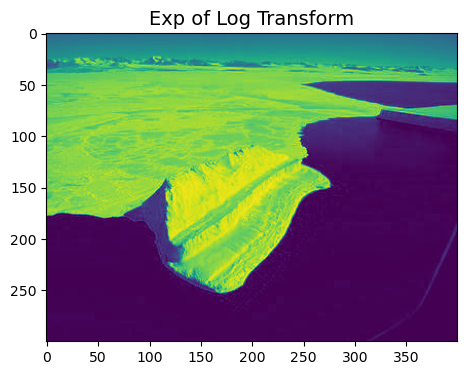

mean(mtrx) = 0.38694212
std(mtrx) = 0.37984067


In [33]:
'''Other Mathematical Operations on a Matrix'''

exp_mtrx = np.exp(log_mtrx)     # exponential

plt.figure(6)
plt.imshow(exp_mtrx)
plt.title('Exp of Log Transform', fontsize=14)
plt.show()

mtrx_mean = exp_mtrx.mean()         # arithmetic mean
print('mean(mtrx) =', mtrx_mean)

mtrx_std = exp_mtrx.std()           # standard deviation
print('std(mtrx) =', mtrx_std)

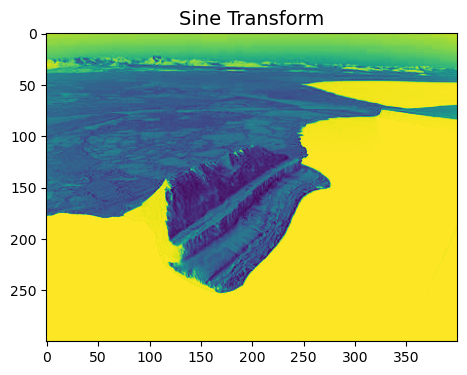

mean(mtrx) = 0.86122394
std(mtrx) = 0.1534877


In [34]:
'''Other Mathematical Operations on a Matrix'''

sin_mtrx = np.sin(mtrx + np.pi/2)  # sine

plt.figure(7)
plt.imshow(sin_mtrx)
plt.title('Sine Transform', fontsize=14)
plt.show()

mtrx_mean = sin_mtrx.mean()         # arithmetic mean
print('mean(mtrx) =', mtrx_mean)

mtrx_std = sin_mtrx.std()           # standard deviation
print('std(mtrx) =', mtrx_std)

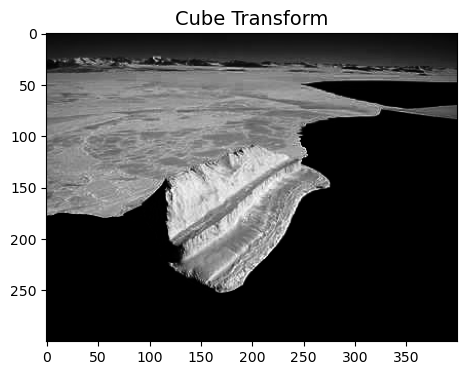

mean(mtrx) = 0.2348578
std(mtrx) = 0.28249925


In [35]:
'''Other Mathematical Operations on a Matrix'''

mtrx_cubed = mtrx**3  # powers

plt.figure(8)
plt.imshow(mtrx_cubed, cmap='gray')
plt.title('Cube Transform', fontsize=14)
plt.show()

mtrx_mean = mtrx_cubed.mean()         # arithmetic mean
print('mean(mtrx) =', mtrx_mean)

mtrx_std = mtrx_cubed.std()           # standard deviation
print('std(mtrx) =', mtrx_std)

#### [Transposition](#toc)<a id="mattransp"></a>

In [36]:
'''Matrix Transposition'''
'''clockwise rotation followed by horizontal right to left flip'''

mtrx = np.random.random((5,7))

np.set_printoptions(precision=3,threshold=20,edgeitems=12,linewidth=100) # one way to control printing of numpy arrays

print('mtrx =\n',mtrx)

mtrx_T = mtrx.transpose()       # transpose of a mtrx: M[i,j] -> M[j,i]

print('mtrx^T =\n', mtrx_T)

mtrx =
 [[0.144 0.764 0.416 0.429 0.304 0.149 0.642]
 [0.265 0.452 0.323 0.605 0.48  0.797 0.235]
 [0.574 0.084 0.085 0.974 0.38  0.766 0.281]
 [0.143 0.455 0.244 0.154 0.338 0.788 0.849]
 [0.929 0.048 0.25  0.892 0.841 0.84  0.479]]
mtrx^T =
 [[0.144 0.265 0.574 0.143 0.929]
 [0.764 0.452 0.084 0.455 0.048]
 [0.416 0.323 0.085 0.244 0.25 ]
 [0.429 0.605 0.974 0.154 0.892]
 [0.304 0.48  0.38  0.338 0.841]
 [0.149 0.797 0.766 0.788 0.84 ]
 [0.642 0.235 0.281 0.849 0.479]]


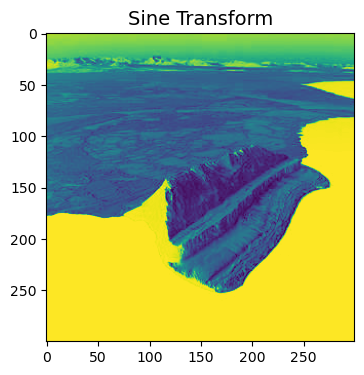

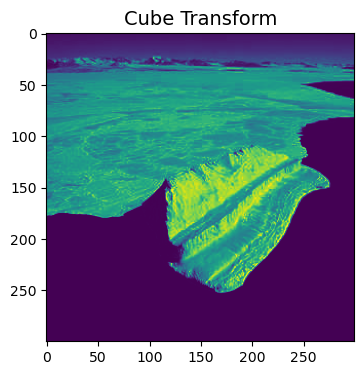

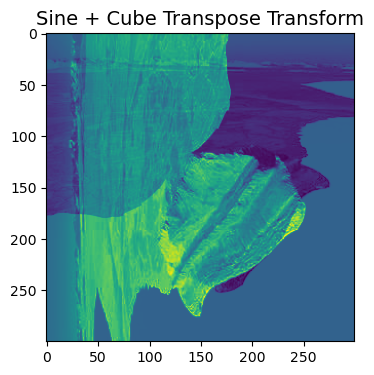

In [37]:
'''Matrix Transposition'''
'''Example of adding a transformed matrix to another transform transposed'''

'''note: to add a matrix to its transpose, a matrix must be square'''

n_rows = block.shape[0]
n_columns = n_rows

mtrx = np.copy(block[:n_rows,:n_columns,0])   # select a square block; red channel

sin_mtrx = np.sin(mtrx + np.pi/2)  # sine

sin_mtrx /= sin_mtrx.max()
plt.figure(9)
plt.imshow(sin_mtrx)
plt.title('Sine Transform', fontsize=14)
plt.show()

mtrx_cubed = mtrx**3                # powers

plt.figure(10)
plt.imshow(mtrx_cubed)
plt.title('Cube Transform', fontsize=14)
plt.show()

plt.figure(11)
plt.imshow(sin_mtrx + mtrx_cubed.transpose())    # sine + cubed transposed
plt.title('Sine + Cube Transpose Transform', fontsize=14)
plt.show()

#### [Element-by-element search](#toc)<a id="matsearch"></a>

In [38]:
'''Searching a matrix for entries matching a test'''

# what are the indices of the values in "mtrx" that satisfy: mtrx >= 0.3
(idx_ids, jdx_ids) = np.where(mtrx >= 0.3) 

np.set_printoptions(precision=3, threshold=20, edgeitems=5, linewidth=100) 

print('matrix =\n', mtrx)
print('ith indices = ',idx_ids)
print('jth indices = ',jdx_ids)

matrix =
 [[0.329 0.329 0.329 0.329 0.329 ... 0.384 0.384 0.384 0.384 0.384]
 [0.329 0.329 0.329 0.329 0.329 ... 0.388 0.388 0.388 0.388 0.388]
 [0.345 0.345 0.345 0.345 0.345 ... 0.392 0.392 0.392 0.392 0.392]
 [0.357 0.357 0.357 0.357 0.357 ... 0.4   0.4   0.4   0.4   0.4  ]
 [0.361 0.361 0.361 0.361 0.361 ... 0.408 0.408 0.408 0.408 0.408]
 ...
 [0.004 0.004 0.004 0.004 0.004 ... 0.004 0.004 0.004 0.004 0.004]
 [0.004 0.004 0.004 0.004 0.004 ... 0.012 0.    0.    0.    0.   ]
 [0.004 0.004 0.004 0.004 0.004 ... 0.012 0.    0.    0.    0.   ]
 [0.004 0.004 0.004 0.004 0.004 ... 0.012 0.    0.    0.    0.   ]
 [0.004 0.004 0.004 0.004 0.004 ... 0.012 0.    0.    0.    0.   ]]
ith indices =  [  0   0   0   0   0 ... 252 252 252 252 252]
jth indices =  [  0   1   2   3   4 ... 171 172 173 174 175]


In [39]:
'''Verify the searched elements'''

mtrx[idx_ids, jdx_ids].min()

0.3019608

In [40]:
mtrx[idx_ids, jdx_ids].shape

(54533,)

In [41]:
mtrx[idx_ids, jdx_ids].dtype

dtype('float32')